<a href="https://colab.research.google.com/github/GuiRibCarra/Busca-Gulosa-A_star/blob/main/Arad_Bucharest_Buscas_Gulosa_A_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Grafo da Região e Distancia das Cidades tendo como Objetivo Bucharest


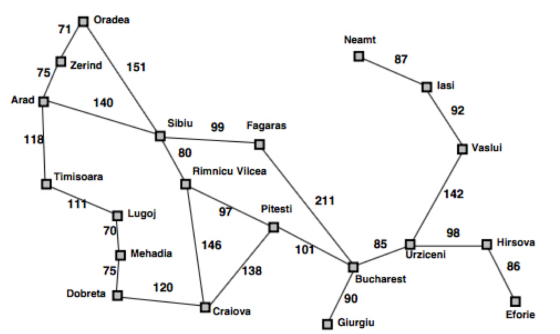
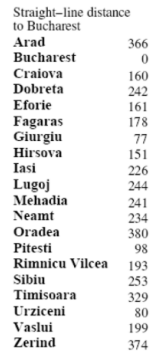

# Grafo

In [ ]:
class Vertice:
  def __init__(self,rotulo,distancia_objetivo):
    self.rotulo = rotulo
    self.visitado = False
    self.distancia_objetivo = distancia_objetivo
    self.adjacentes = []

  def adiciona_adjacente(self,adjacente):
    self.adjacentes.append(adjacente)

  def mostra_adjacentes(self):
    for i in self.adjacentes:
      print(i.vertice.rotulo, i.custo)

In [ ]:
class Adjacente:
  def __init__(self,vertice,custo):
    self.vertice = vertice
    self.custo = custo
    self.distancia_aestrela = vertice.distancia_objetivo + self.custo

In [ ]:
class Grafo:
  arad = Vertice('Arad',366)
  zerind = Vertice('Zerind',374)
  oradea = Vertice('Oradea',380)
  sibiu = Vertice('Sibiu',253)
  timisoara = Vertice('Timisoara',329)
  lugoj = Vertice('Lugoj',244)
  mehadia = Vertice('Mehadia',241)
  dobreta = Vertice('Dobreta',242)
  craiova = Vertice('Craiova',160)
  rimnicu = Vertice('Rimnicu',193)
  fagaras = Vertice('Fagaras',178)
  pitesti = Vertice('Pitesti',98)
  bucharest = Vertice('Bucharest',0)
  giurgiu = Vertice('Giurgiu',77)

  arad.adiciona_adjacente(Adjacente(zerind,75))
  arad.adiciona_adjacente(Adjacente(sibiu,140))
  arad.adiciona_adjacente(Adjacente(timisoara,118))

  zerind.adiciona_adjacente(Adjacente(arad,75))
  zerind.adiciona_adjacente(Adjacente(oradea,71))

  oradea.adiciona_adjacente(Adjacente(zerind,71))
  oradea.adiciona_adjacente(Adjacente(sibiu,151))

  sibiu.adiciona_adjacente(Adjacente(fagaras,99))
  sibiu.adiciona_adjacente(Adjacente(rimnicu,80))
  sibiu.adiciona_adjacente(Adjacente(arad,140))
  sibiu.adiciona_adjacente(Adjacente(oradea,151))

  fagaras.adiciona_adjacente(Adjacente(bucharest,211))
  fagaras.adiciona_adjacente(Adjacente(sibiu,99))

  bucharest.adiciona_adjacente(Adjacente(fagaras,211))
  bucharest.adiciona_adjacente(Adjacente(pitesti,101))
  bucharest.adiciona_adjacente(Adjacente(giurgiu,90))

  giurgiu.adiciona_adjacente(Adjacente(bucharest,90))

  rimnicu.adiciona_adjacente(Adjacente(pitesti,97))
  rimnicu.adiciona_adjacente(Adjacente(craiova,146))
  rimnicu.adiciona_adjacente(Adjacente(sibiu,80))

  pitesti.adiciona_adjacente(Adjacente(bucharest,101))
  pitesti.adiciona_adjacente(Adjacente(craiova,138))
  pitesti.adiciona_adjacente(Adjacente(rimnicu,97))

  craiova.adiciona_adjacente(Adjacente(pitesti,138))
  craiova.adiciona_adjacente(Adjacente(rimnicu,146))
  craiova.adiciona_adjacente(Adjacente(dobreta,120))

  dobreta.adiciona_adjacente(Adjacente(craiova,120))
  dobreta.adiciona_adjacente(Adjacente(mehadia,75))

  mehadia.adiciona_adjacente(Adjacente(dobreta,75))
  mehadia.adiciona_adjacente(Adjacente(lugoj,70))

  lugoj.adiciona_adjacente(Adjacente(mehadia,70))
  lugoj.adiciona_adjacente(Adjacente(timisoara,111))

  timisoara.adiciona_adjacente(Adjacente(lugoj,111))
  timisoara.adiciona_adjacente(Adjacente(arad,118))


In [ ]:
grafo = Grafo()

grafo.arad.mostra_adjacentes()

Zerind 75
Sibiu 140
Timisoara 118


# Busca Gulosa

usaremos como base a distancia linear ate bucharest

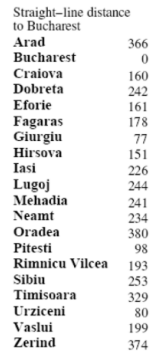

Vetor Ordenado

In [ ]:
import numpy as np
class VetorOrdenado:
  def __init__(self,capacidade):
    self.capacidade = capacidade
    self.ultima_posicao = -1
    self.valores = np.empty(self.capacidade,dtype=object)

  def imprime(self):
    if self.ultima_posicao == -1:
      print("O vetor esta vazio")
    else:
      for i in range(self.ultima_posicao + 1):
        print(i,' -- ',self.valores[i].rotulo,' -- ',self.valores[i].distancia_objetivo)

  def insere(self,vertice):
    if self.ultima_posicao == self.capacidade - 1:
      print('Capacidade maxima atingida')
      return

    posicao = 0
    for i in range(self.ultima_posicao +1):
      posicao = i
      if self.valores[i].distancia_objetivo>vertice.distancia_objetivo:
        break
      if i == self.ultima_posicao:
        posicao = i + 1

    x = self.ultima_posicao
    while x >= posicao:
      self.valores[x+1] = self.valores[x]
      x-=1

    self.valores[posicao] = vertice
    self.ultima_posicao += 1

Testes para verificação

In [ ]:
vetor = VetorOrdenado(5)
vetor.insere(grafo.arad)
vetor.insere(grafo.craiova)
vetor.insere(grafo.bucharest)
vetor.insere(grafo.dobreta)

vetor.imprime()
print("--------------------------------------------------")
vetor.insere(grafo.lugoj)
vetor.imprime()

0  --  Bucharest  --  0
1  --  Craiova  --  160
2  --  Dobreta  --  242
3  --  Arad  --  366
--------------------------------------------------
0  --  Bucharest  --  0
1  --  Craiova  --  160
2  --  Dobreta  --  242
3  --  Lugoj  --  244
4  --  Arad  --  366


Implementação

In [ ]:
class Gulosa:
  def __init__(self,objetivo):
    self.objetivo = objetivo
    self.encontrado = False

  def buscar(self,atual):
    print('---------')
    print('Atual: {}'.format(atual.rotulo))
    atual.visitado = True

    if atual == self.objetivo:
      self.encontrado = True
    else:
      vetor_ordenado = VetorOrdenado(len(atual.adjacentes))
      for adjacente in atual.adjacentes:
        if adjacente.vertice.visitado == False:
          adjacente.vertice.visitado == True
          vetor_ordenado.insere(adjacente.vertice)
      vetor_ordenado.imprime()

      if vetor_ordenado.valores[0] != None:
        self.buscar(vetor_ordenado.valores[0])

In [ ]:
busca_gulosa = Gulosa(grafo.bucharest)
busca_gulosa.buscar(grafo.arad)


---------
Atual: Arad
0  --  Sibiu  --  253
1  --  Timisoara  --  329
2  --  Zerind  --  374
---------
Atual: Sibiu
0  --  Fagaras  --  178
1  --  Rimnicu  --  193
2  --  Oradea  --  380
---------
Atual: Fagaras
0  --  Bucharest  --  0
---------
Atual: Bucharest


-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


# Busca A* (A Estrela)

Irá utilizar a distancia linear da tabela e a distancia que esta no grafo

Vetor Ordenado (Adjacentes)

In [ ]:
import numpy as np
class VetorOrdenado:
  def __init__(self,capacidade):
    self.capacidade = capacidade
    self.ultima_posicao = -1
    self.valores = np.empty(self.capacidade,dtype=object)

  def imprime(self):
    if self.ultima_posicao == -1:
      print("O vetor esta vazio")
    else:
      for i in range(self.ultima_posicao + 1):
        print(i,' -- ',self.valores[i].vertice.rotulo,' -- ',self.valores[i].custo,
              ' -- ', self.valores[i].vertice.distancia_objetivo,
              ' -- ', self.valores[i].distancia_aestrela)

  def insere(self,adjacente):
    if self.ultima_posicao == self.capacidade - 1:
      print('Capacidade maxima atingida')
      return

    posicao = 0
    for i in range(self.ultima_posicao +1):
      posicao = i
      if self.valores[i].distancia_aestrela>adjacente.distancia_aestrela:
        break
      if i == self.ultima_posicao:
        posicao = i + 1

    x = self.ultima_posicao
    while x >= posicao:
      self.valores[x+1] = self.valores[x]
      x-=1

    self.valores[posicao] = adjacente
    self.ultima_posicao += 1

Teste para verificacao


In [ ]:
vetor = VetorOrdenado(3)
vetor.insere(grafo.arad.adjacentes[0])
vetor.insere(grafo.arad.adjacentes[1])
vetor.insere(grafo.arad.adjacentes[2])
vetor.imprime()

0  --  Sibiu  --  140  --  253  --  393
1  --  Timisoara  --  118  --  329  --  447
2  --  Zerind  --  75  --  374  --  449


Implementação

In [ ]:
class AEstrela:
  def __init__(self,objetivo):
    self.objetivo = objetivo
    self.encontrado = False

  def buscar(self,atual):
    print('----------------')
    print('Atual:{}'.format(atual.rotulo))
    atual.visitado = True

    if atual == self.objetivo:
      self.encontrado = True
    else:
      vetor_ordenado = VetorOrdenado(len(atual.adjacentes))
      for adjacente in atual.adjacentes:
        if adjacente.vertice.visitado == False:
          adjacente.vertice.visitado = True
          vetor_ordenado.insere(adjacente)
      vetor_ordenado.imprime()

      if vetor_ordenado.valores[0] != None:
        self.buscar(vetor_ordenado.valores[0].vertice)

Teste

In [ ]:
busca_aestrela = AEstrela(grafo.bucharest)
busca_aestrela.buscar(grafo.arad)

----------------
Atual:Arad
0  --  Sibiu  --  140  --  253  --  393
1  --  Timisoara  --  118  --  329  --  447
2  --  Zerind  --  75  --  374  --  449
----------------
Atual:Sibiu
0  --  Rimnicu  --  80  --  193  --  273
1  --  Fagaras  --  99  --  178  --  277
2  --  Oradea  --  151  --  380  --  531
----------------
Atual:Rimnicu
0  --  Pitesti  --  97  --  98  --  195
1  --  Craiova  --  146  --  160  --  306
----------------
Atual:Pitesti
0  --  Bucharest  --  101  --  0  --  101
----------------
Atual:Bucharest
